In [1]:
import os
import numpy as np

import gemmi



In [8]:
parent_folder_predictions = "/home/abharadwaj1/papers/elife_paper/figure_information/data/model_angelo_predictions_new_version"

num_atoms_using_deposited = {}
num_atoms_using_hybrid = {}
num_atoms_using_unsharpened = {}

num_atoms_using_deposited_raw = {}
num_atoms_using_hybrid_raw = {}
num_atoms_using_unsharpened_raw = {}

num_residues_using_deposited = {}
num_residues_using_hybrid = {}
num_residues_using_unsharpened = {}

num_residues_using_deposited_raw = {}
num_residues_using_hybrid_raw = {}
num_residues_using_unsharpened_raw = {}

def get_num_residues(structure):
    num_residues = 0
    for chain in structure[0]:
        num_residues += len(chain)
    return num_residues

for emdb_pdb in os.listdir(parent_folder_predictions):
    # make sure emdb_pdb is a string
    if not isinstance(emdb_pdb, str):
        continue
    
    emdb, pdb = emdb_pdb.split("_")
    emdb_folder = os.path.join(parent_folder_predictions, emdb_pdb)

    # make sure emdb_folder is a folder
    if not os.path.isdir(emdb_folder):
        continue

    model_angelo_predicted_structure_deposited = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_deposited", f"emd_{emdb}_model_angelo_deposited.cif")
    model_angelo_predicted_structure_hybrid = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_hybrid", f"emd_{emdb}_model_angelo_hybrid.cif")
    model_angelo_predicted_structure_unsharpened = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_unsharpened", f"emd_{emdb}_model_angelo_unsharpened.cif")

    model_angelo_predicted_structure_deposited_raw = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_deposited", f"emd_{emdb}_model_angelo_deposited_raw.cif")
    model_angelo_predicted_structure_hybrid_raw = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_hybrid", f"emd_{emdb}_model_angelo_hybrid_raw.cif")
    model_angelo_predicted_structure_unsharpened_raw = os.path.join(emdb_folder, f"emd_{emdb}_model_angelo_unsharpened", f"emd_{emdb}_model_angelo_unsharpened_raw.cif")

    # make sure all files exist
    deposited_file_exists = os.path.isfile(model_angelo_predicted_structure_deposited)
    hybrid_file_exists = os.path.isfile(model_angelo_predicted_structure_hybrid)
    unsharpened_file_exists = os.path.isfile(model_angelo_predicted_structure_unsharpened)

#   deposited_file_exists_raw = os.path.isfile(model_angelo_predicted_structure_deposited_raw)
    hybrid_file_exists_raw = os.path.isfile(model_angelo_predicted_structure_hybrid_raw)
    unsharpened_file_exists_raw = os.path.isfile(model_angelo_predicted_structure_unsharpened_raw)


    if not (hybrid_file_exists and unsharpened_file_exists) or not (hybrid_file_exists_raw and unsharpened_file_exists_raw):
        continue

    # read in the structures
#    deposited_structure = gemmi.read_structure(model_angelo_predicted_structure_deposited)
    hybrid_structure = gemmi.read_structure(model_angelo_predicted_structure_hybrid)
    unsharpened_structure = gemmi.read_structure(model_angelo_predicted_structure_unsharpened)

#    deposited_structure_raw = gemmi.read_structure(model_angelo_predicted_structure_deposited_raw)
    hybrid_structure_raw = gemmi.read_structure(model_angelo_predicted_structure_hybrid_raw)
    unsharpened_structure_raw = gemmi.read_structure(model_angelo_predicted_structure_unsharpened_raw)

    # get the number of atoms in each structure
#    num_atoms_deposited = deposited_structure[0].count_atom_sites()
    num_atoms_hybrid = hybrid_structure[0].count_atom_sites()
    num_atoms_unsharpened = unsharpened_structure[0].count_atom_sites()

#    num_atoms_deposited_raw = deposited_structure_raw[0].count_atom_sites()
    num_atoms_hybrid_raw = hybrid_structure_raw[0].count_atom_sites()
    num_atoms_unsharpened_raw = unsharpened_structure_raw[0].count_atom_sites()

    # get the number of residues in each structure
#    num_residues_deposited = get_num_residues(deposited_structure)
    num_residues_hybrid = get_num_residues(hybrid_structure)
    num_residues_unsharpened = get_num_residues(unsharpened_structure)

#    num_residues_deposited_raw = get_num_residues(deposited_structure_raw)
    num_residues_hybrid_raw = get_num_residues(hybrid_structure_raw)
    num_residues_unsharpened_raw = get_num_residues(unsharpened_structure_raw)

    # add the number of atoms to the dictionary
#    num_atoms_using_deposited[emdb] = num_atoms_deposited
    num_atoms_using_hybrid[emdb] = num_atoms_hybrid
    num_atoms_using_unsharpened[emdb] = num_atoms_unsharpened

#    num_atoms_using_deposited_raw[emdb] = num_atoms_deposited_raw
    num_atoms_using_hybrid_raw[emdb] = num_atoms_hybrid_raw
    num_atoms_using_unsharpened_raw[emdb] = num_atoms_unsharpened_raw

    
    # add the number of residues to the dictionary
#    num_residues_using_deposited[emdb] = num_residues_deposited
    num_residues_using_hybrid[emdb] = num_residues_hybrid
    num_residues_using_unsharpened[emdb] = num_residues_unsharpened

#    num_residues_using_deposited_raw[emdb] = num_residues_deposited_raw
    num_residues_using_hybrid_raw[emdb] = num_residues_hybrid_raw
    num_residues_using_unsharpened_raw[emdb] = num_residues_unsharpened_raw





In [12]:
num_residues_using_hybrid_raw['10106'] -  num_residues_using_unsharpened_raw['10106'], num_residues_using_hybrid['10106'] - num_residues_using_unsharpened['10106']

(780, 1306)

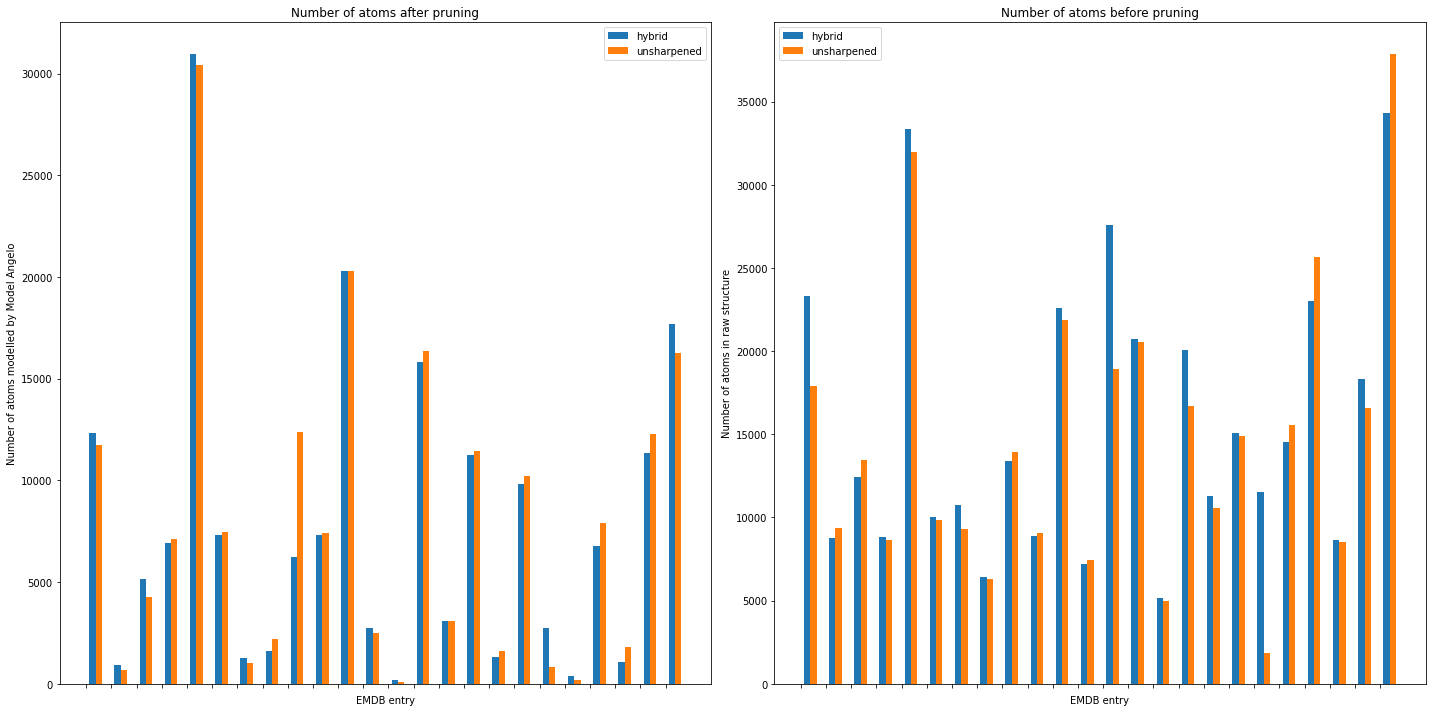

In [5]:
# Plot the number of atoms in each type of structure for each EMDB entry as a bar plot
import matplotlib.pyplot as plt

# make sure the number of entries in each dictionary is the same
assert len(num_atoms_using_hybrid) == len(num_atoms_using_unsharpened)

#num_atoms_deposited_list = list(num_atoms_using_deposited.values())
num_atoms_hybrid_list = list(num_atoms_using_hybrid.values())
num_atoms_unsharpened_list = list(num_atoms_using_unsharpened.values())

#num_atoms_deposited_list_raw = list(num_atoms_using_deposited_raw.values())
num_atoms_hybrid_list_raw = list(num_atoms_using_hybrid_raw.values())
num_atoms_unsharpened_list_raw = list(num_atoms_using_unsharpened_raw.values())

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

#ax[0].bar(np.arange(len(num_atoms_deposited_list)), num_atoms_deposited_list, width=0.25, label="deposited");
ax[0].bar(np.arange(len(num_atoms_hybrid_list)) + 0.25, num_atoms_hybrid_list, width=0.25, label="hybrid");
ax[0].bar(np.arange(len(num_atoms_unsharpened_list)) + 0.5, num_atoms_unsharpened_list, width=0.25, label="unsharpened");
ax[0].set_xticks(np.arange(len(num_atoms_hybrid_list)))
ax[0].set_xticklabels(list(num_atoms_using_deposited.keys()), rotation=90)
ax[0].set_ylabel("Number of atoms modelled by Model Angelo")
ax[0].set_xlabel("EMDB entry")
ax[0].set_title("Number of atoms after pruning")
ax[0].legend()

# plot the number of atoms in the raw structures
#ax[1].bar(np.arange(len(num_atoms_deposited_list_raw)), num_atoms_deposited_list_raw, width=0.25, label="deposited");
ax[1].bar(np.arange(len(num_atoms_hybrid_list_raw)) + 0.25, num_atoms_hybrid_list_raw, width=0.25, label="hybrid");
ax[1].bar(np.arange(len(num_atoms_unsharpened_list_raw)) + 0.5, num_atoms_unsharpened_list_raw, width=0.25, label="unsharpened");
ax[1].set_xticks(np.arange(len(num_atoms_hybrid_list_raw)))
ax[1].set_xticklabels(list(num_atoms_using_deposited_raw.keys()), rotation=90)
ax[1].set_ylabel("Number of atoms in raw structure")
ax[1].set_xlabel("EMDB entry")
ax[1].set_title("Number of atoms before pruning")
ax[1].legend()

plt.tight_layout()




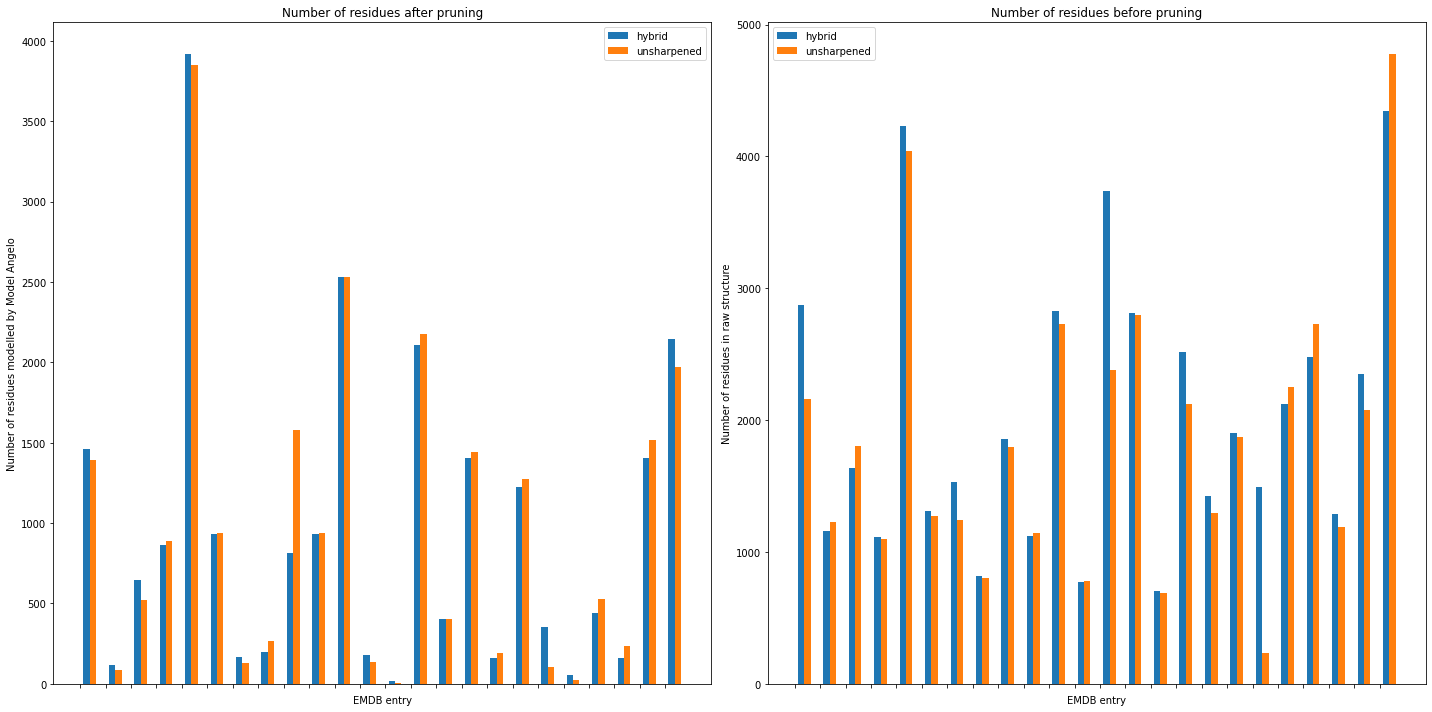

In [7]:
# Plot the number of residues in each type of structure for each EMDB entry as a bar plot
import matplotlib.pyplot as plt

# make sure the number of entries in each dictionary is the same
assert  len(num_residues_using_hybrid) == len(num_residues_using_unsharpened)

num_residues_deposited_list = list(num_residues_using_deposited.values())
num_residues_hybrid_list = list(num_residues_using_hybrid.values())
num_residues_unsharpened_list = list(num_residues_using_unsharpened.values())

num_residues_deposited_list_raw = list(num_residues_using_deposited_raw.values())
num_residues_hybrid_list_raw = list(num_residues_using_hybrid_raw.values())
num_residues_unsharpened_list_raw = list(num_residues_using_unsharpened_raw.values())


fig, ax = plt.subplots(1, 2, figsize=(20, 10))

#ax[0].bar(np.arange(len(num_residues_deposited_list)), num_residues_deposited_list, width=0.25, label="deposited");
ax[0].bar(np.arange(len(num_residues_hybrid_list)) + 0.25, num_residues_hybrid_list, width=0.25, label="hybrid");
ax[0].bar(np.arange(len(num_residues_unsharpened_list)) + 0.5, num_residues_unsharpened_list, width=0.25, label="unsharpened");
ax[0].set_xticks(np.arange(len(num_residues_hybrid_list)))
ax[0].set_xticklabels(list(num_residues_using_deposited.keys()), rotation=90)
ax[0].set_ylabel("Number of residues modelled by Model Angelo")
ax[0].set_xlabel("EMDB entry")
ax[0].set_title("Number of residues after pruning")
ax[0].legend()

# plot the number of atoms in the raw structures
#ax[1].bar(np.arange(len(num_residues_deposited_list_raw)), num_residues_deposited_list_raw, width=0.25, label="deposited");
ax[1].bar(np.arange(len(num_residues_hybrid_list_raw)) + 0.25, num_residues_hybrid_list_raw, width=0.25, label="hybrid");
ax[1].bar(np.arange(len(num_residues_unsharpened_list_raw)) + 0.5, num_residues_unsharpened_list_raw, width=0.25, label="unsharpened");
ax[1].set_xticks(np.arange(len(num_residues_hybrid_list_raw)))
ax[1].set_xticklabels(list(num_residues_using_deposited_raw.keys()), rotation=90)
ax[1].set_ylabel("Number of residues in raw structure")
ax[1].set_xlabel("EMDB entry")
ax[1].set_title("Number of residues before pruning")
ax[1].legend()

plt.tight_layout()

Text(0.5, 1.0, 'Number of residues after pruning')

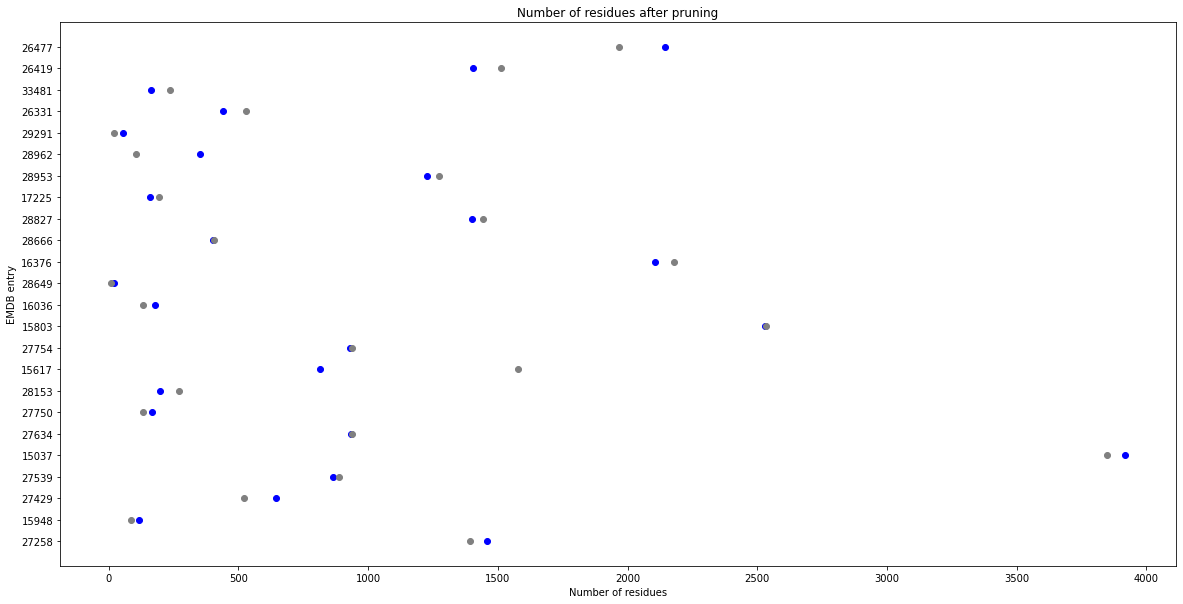

In [8]:
# Draw a plot such that along Y axis we arrange the EMDB entries and along X axis we plot the number of residues in each structure
# For each EMDB entry, we plot three dots, one for "deposited", one for "hybrid" and one for "unsharpened". 
# these dots have consistent color
# deposited: brown, hybrid: blur, unsharpened: gray

import matplotlib.pyplot as plt
emdb_list = list(num_residues_using_hybrid.keys())
#num_residues_deposited_list = list(num_residues_using_deposited.values())
num_residues_hybrid_list = list(num_residues_using_hybrid.values())
num_residues_unsharpened_list = list(num_residues_using_unsharpened.values())

#num_residues_deposited_list_raw = list(num_residues_using_deposited_raw.values())
num_residues_hybrid_list_raw = list(num_residues_using_hybrid_raw.values())
num_residues_unsharpened_list_raw = list(num_residues_using_unsharpened_raw.values())

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#ax.scatter(num_residues_deposited_list, emdb_list, color="brown", label="deposited");
ax.scatter(num_residues_hybrid_list, emdb_list, color="blue", label="hybrid");
ax.scatter(num_residues_unsharpened_list, emdb_list, color="gray", label="unsharpened");
ax.set_yticks(np.arange(len(emdb_list)))
ax.set_yticklabels(emdb_list, rotation=0)
ax.set_xlabel("Number of residues")
ax.set_ylabel("EMDB entry")
ax.set_title("Number of residues after pruning")




Text(0.5, 1.0, 'Number of residues after pruning')

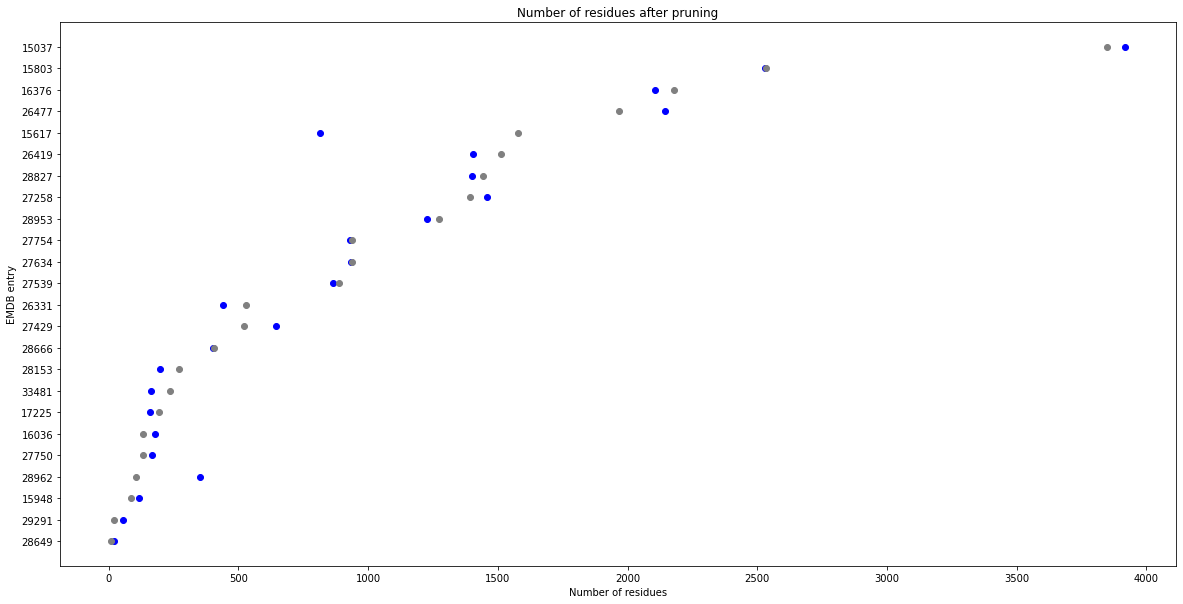

In [9]:
# Plot the same as above but now arrange the EMDB list based on the number of residues in the unsharpened structure
import matplotlib.pyplot as plt

# make sure the number of entries in each dictionary is the same
assert len(num_residues_using_hybrid) == len(num_residues_using_unsharpened)

emdb_list_ordered = [emdb for _, emdb in sorted(zip(num_residues_unsharpened_list, emdb_list))]
#num_residues_deposited_list_ordered = [num_residues_using_deposited[emdb] for emdb in emdb_list_ordered]
num_residues_hybrid_list_ordered = [num_residues_using_hybrid[emdb] for emdb in emdb_list_ordered]
num_residues_unsharpened_list_ordered = [num_residues_using_unsharpened[emdb] for emdb in emdb_list_ordered]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#ax.scatter(num_residues_deposited_list_ordered, emdb_list_ordered, color="brown", label="deposited");
ax.scatter(num_residues_hybrid_list_ordered, emdb_list_ordered, color="blue", label="hybrid");
ax.scatter(num_residues_unsharpened_list_ordered, emdb_list_ordered, color="gray", label="unsharpened");
ax.set_yticks(np.arange(len(emdb_list_ordered)))
ax.set_yticklabels(emdb_list_ordered, rotation=0)
ax.set_xlabel("Number of residues")
ax.set_ylabel("EMDB entry")
ax.set_title("Number of residues after pruning")


Text(0.5, 1.0, 'Number of residues before pruning')

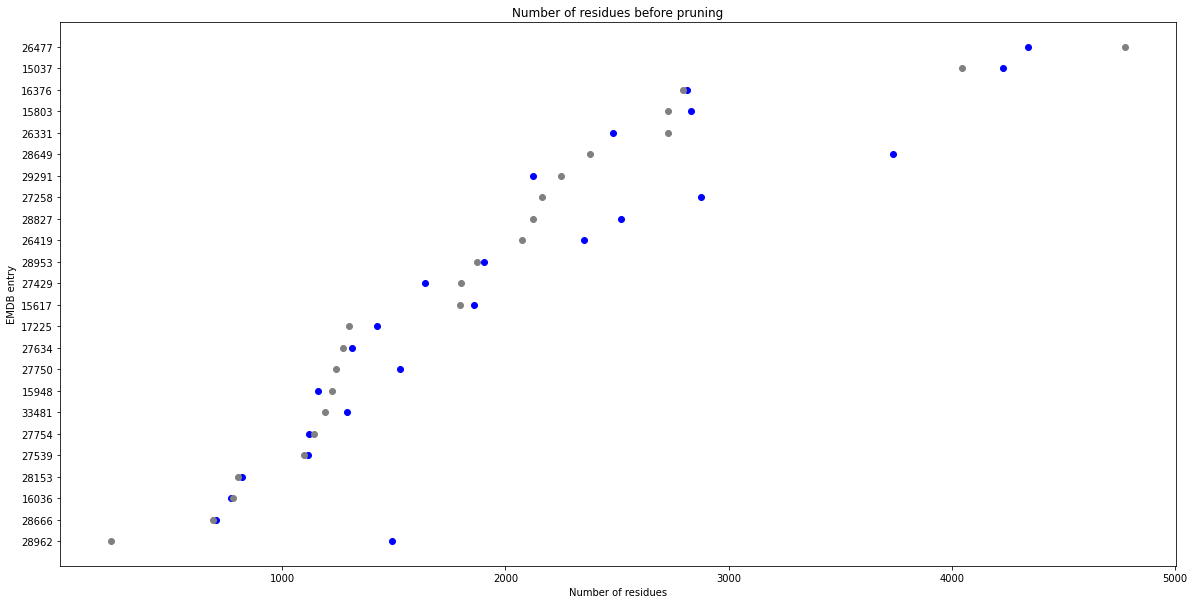

In [10]:
# now plot the same but for the raw structures
import matplotlib.pyplot as plt

# make sure the number of entries in each dictionary is the same
assert len(num_residues_using_hybrid_raw) == len(num_residues_using_unsharpened_raw)

emdb_list_ordered = [emdb for _, emdb in sorted(zip(num_residues_unsharpened_list_raw, emdb_list))]
#num_residues_deposited_list_ordered = [num_residues_using_deposited_raw[emdb] for emdb in emdb_list_ordered]
num_residues_hybrid_list_ordered = [num_residues_using_hybrid_raw[emdb] for emdb in emdb_list_ordered]
num_residues_unsharpened_list_ordered = [num_residues_using_unsharpened_raw[emdb] for emdb in emdb_list_ordered]

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
#ax.scatter(num_residues_deposited_list_ordered, emdb_list_ordered, color="brown", label="deposited");
ax.scatter(num_residues_hybrid_list_ordered, emdb_list_ordered, color="blue", label="hybrid");
ax.scatter(num_residues_unsharpened_list_ordered, emdb_list_ordered, color="gray", label="unsharpened");
ax.set_yticks(np.arange(len(emdb_list_ordered)))
ax.set_yticklabels(emdb_list_ordered, rotation=0)
ax.set_xlabel("Number of residues")
ax.set_ylabel("EMDB entry")
ax.set_title("Number of residues before pruning")





Text(0.5, 1.0, 'Difference in number of residues between hybrid and unsharpened maps')

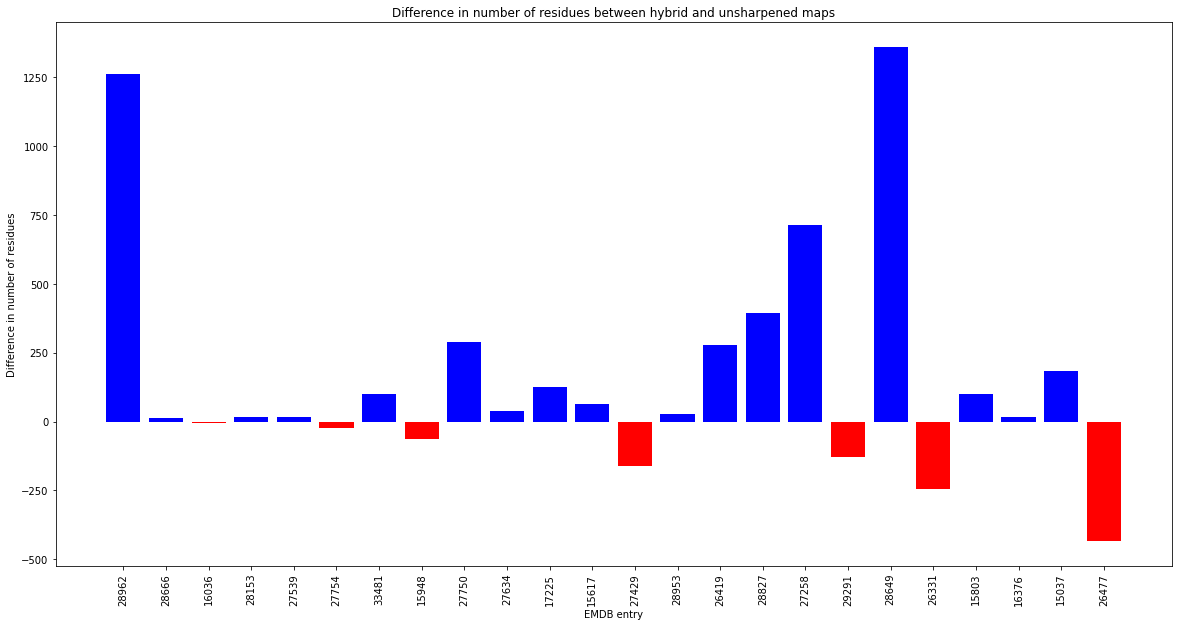

In [11]:
# Now plot the difference between the number of residues using hybrid map versus the number of residues using unsharpened map
# along Y axis we arrange the EMDB entries and along X axis we plot the difference between the number of residues in each structure
# We do not care about deposited structures here

import matplotlib.pyplot as plt

# make sure the number of entries in each dictionary is the same
assert len(num_residues_using_hybrid) == len(num_residues_using_unsharpened)

num_residues_hybrid_list_ordered = [num_residues_using_hybrid_raw[emdb] for emdb in emdb_list_ordered]
num_residues_unsharpened_list_ordered = [num_residues_using_unsharpened_raw[emdb] for emdb in emdb_list_ordered]

num_residues_difference_before_pruning = [num_residues_hybrid_list_ordered[i] - num_residues_unsharpened_list_ordered[i] for i in range(len(emdb_list_ordered))]

emdb_list_ordered_hybrid_minus_unsharpened = emdb_list_ordered
num_residues_difference_before_pruning_hybrid_minus_unsharpened = num_residues_difference_before_pruning

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# draw a bar plot
# color blue if the difference is positive (hybrid has more residues than unsharpened)
# color red if the difference is negative (hybrid has less residues than unsharpened)
ax.bar(np.arange(len(emdb_list_ordered)), num_residues_difference_before_pruning, color=["blue" if num_residues_difference_before_pruning[i] > 0 else "red" for i in range(len(emdb_list_ordered))])
ax.set_xticks(np.arange(len(emdb_list_ordered)))
ax.set_xticklabels(emdb_list_ordered, rotation=90)
ax.set_ylabel("Difference in number of residues")
ax.set_xlabel("EMDB entry")
ax.set_title("Difference in number of residues between hybrid and unsharpened maps")








Text(0.5, 1.0, 'Difference in number of residues between hybrid and unsharpened maps (AFTER PRUNING)')

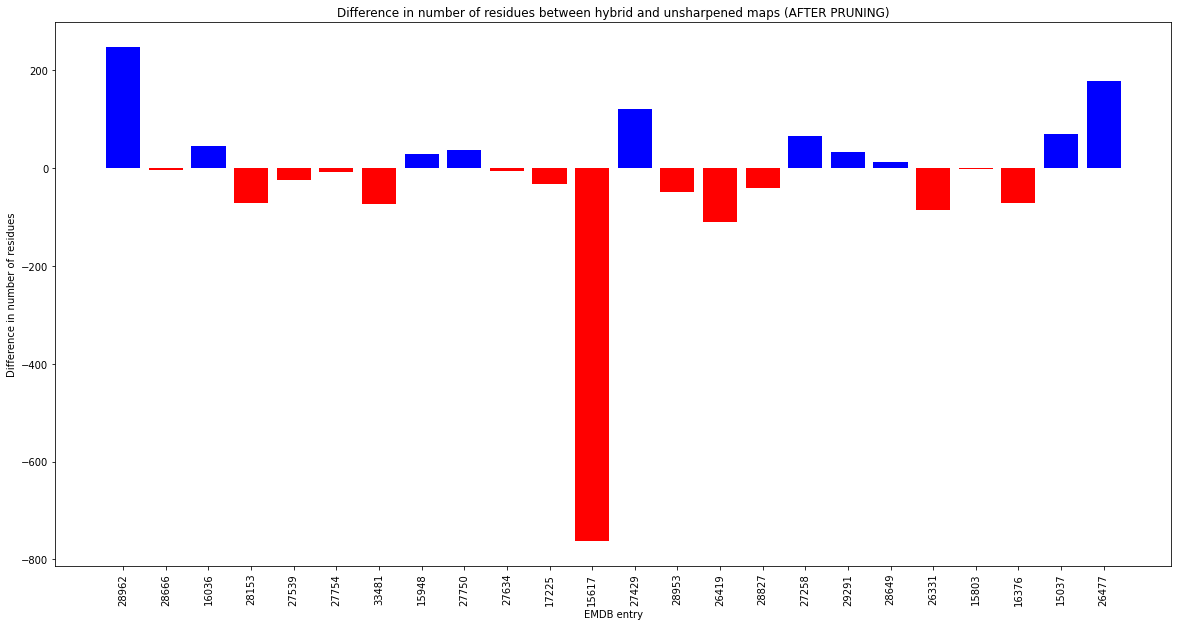

In [13]:
# Now plot the difference between the number of residues using hybrid map versus the number of residues (AFTER PRUNING) using unsharpened maps
# along Y axis we arrange the EMDB entries and along X axis we plot the difference between the number of residues in each structure

import matplotlib.pyplot as plt

# make sure the number of entries in each dictionary is the same
assert len(num_residues_using_hybrid) == len(num_residues_using_unsharpened)

num_residues_hybrid_list_ordered = [num_residues_using_hybrid[emdb] for emdb in emdb_list_ordered]
num_residues_unsharpened_list_ordered = [num_residues_using_unsharpened[emdb] for emdb in emdb_list_ordered]

num_residues_difference = [num_residues_hybrid_list_ordered[i] - num_residues_unsharpened_list_ordered[i] for i in range(len(emdb_list_ordered))]
emdb_list_ordered_hybrid_minus_unsharpened = emdb_list_ordered
num_residues_difference_after_pruning_hybrid_minus_unsharpened = num_residues_difference

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# draw a bar plot
# color blue if the difference is positive (hybrid has more residues than unsharpened)
# color red if the difference is negative (hybrid has less residues than unsharpened)
ax.bar(np.arange(len(emdb_list_ordered)), num_residues_difference, color=["blue" if num_residues_difference[i] > 0 else "red" for i in range(len(emdb_list_ordered))])
ax.set_xticks(np.arange(len(emdb_list_ordered)))
ax.set_xticklabels(emdb_list_ordered, rotation=90)
ax.set_ylabel("Difference in number of residues")
ax.set_xlabel("EMDB entry")
ax.set_title("Difference in number of residues between hybrid and unsharpened maps (AFTER PRUNING)")


In [40]:
import json 
def get_resolution(emdb_id, all_search_results):
    choose_result = None
    for result in all_search_results:
        if result['emdb_id'] == f"EMD-{emdb_id}":
            choose_result = result
            break
    if choose_result is None:
        assert False, f"EMDB entry not found in search results {emdb_id}"
    
    final_reconstruction = choose_result['structure_determination_list']['structure_determination'][0]['image_processing'][0]['final_reconstruction']
    return float(final_reconstruction['resolution']['valueOf_'])
# Time to draw pretty plots to show the difference between number of residues from hybrid and unsharpened maps
res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}
search_results_json_file = "/home/abharadwaj1/papers/elife_paper/figure_information/data/emdb_search_results/EMDB_search_results_including_low_res.json"

search_results = json.load(open(search_results_json_file, "r"))

def plot_difference_plots(emdb_entry_list, difference_array, xlabel, ylabel, title, figsize_cm=(14,8), \
                        marker="o", markersize=12,fontscale=2.5,font="Helvetica", \
                        linewidth=2,legends=None, num_yticks=5,emdb_list_to_show=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    import matplotlib as mpl
    mpl.rcParams['pdf.fonttype'] = 42

    sns.set_theme(context="paper", font="Helvetica", font_scale=fontscale)
    sns.set_style("white")
    kwargs = dict(linewidth=linewidth)
    # set font size 
    #plt.rcParams.update({'font.size': })
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # arrange the data such that the negative differences are to the left and positive differences are to the right
    # this is to make the plot look nicer
    # we also arrange the EMDB entries in the same order

    # first we get the indices of the sorted array
    sorted_indices = np.argsort(difference_array)
    # then we get the sorted array
    sorted_array = np.sort(difference_array)
    # then we get the sorted EMDB entries
    sorted_emdb_entries = [emdb_entry_list[i] for i in sorted_indices]
    
    
    for emdb in sorted_emdb_entries:
        print(emdb, get_resolution(emdb, search_results))
    

    # now we plot the data as a horizontal bar plot
    # we also add a text label next to the select few EMDB entries based on emdb_list_to_show 

    ax.barh(np.arange(len(emdb_entry_list)), sorted_array, color=["blue" if sorted_array[i] > 0 else "red" for i in range(len(emdb_entry_list))])

    # now we add the text labels
    if emdb_list_to_show is not None:
        for i in range(len(sorted_emdb_entries)):
            if sorted_emdb_entries[i] in emdb_list_to_show:
                emdb_right = True if sorted_array[i] > 0 else False
                if emdb_right:
                    x_distance = 100
                    y_distance = -2
                else:
                    x_distance = -500
                    y_distance = 2

                ax.text(sorted_array[i]+x_distance,i+y_distance, sorted_emdb_entries[i], ha='left', va='center', fontsize=fontscale*10)
                # draw a line from the text label to the bar
                if emdb_right:
                    ax.plot([sorted_array[i], sorted_array[i]+x_distance], [i, i+y_distance], color="black", linewidth=1)
                else:
                    ax.plot([sorted_array[i], sorted_array[i]+x_distance+400], [i, i+y_distance], color="black", linewidth=1)

    # do not show yticks
    ax.set_yticks([])

    # set x limits
    ax.set_xlim([min(difference_array) - 800, max(difference_array) + 200])
    
    # set x ticks at -1000, 0, 1000
    ax.set_xticks([-1000, 0, 1000])
    # set x tick labels
    ax.set_xticklabels(["-1000", "0", "1000"])
    
    # now we draw a vertical line at x=0
    ax.axvline(x=0, color="black", linestyle="--", linewidth=linewidth)

    ax.set_xlabel(xlabel)
    # now we set the ylabel
    ax.set_ylabel(ylabel)
    # now we set the title
    ax.set_title(title)
    # now we set the legend
    if legends is not None:
        ax.legend(legends)

    sns.despine()
    
    plt.tight_layout()
    return fig, ax

15617 3.75
26419 3.7
26331 7.5
33481 3.8
16376 3.22
28153 3.8
28953 4.0
28827 3.53
17225 3.4
27539 3.26
27754 3.25
27634 3.6
28666 3.5
15803 3.2
28649 5.5
15948 4.13
29291 6.3
27750 4.26
16036 4.1
27258 3.59
15037 3.29
27429 3.9
26477 3.9
28962 6.4


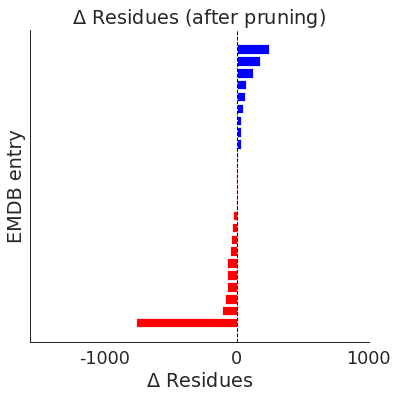

In [42]:

# plot the difference between the number of residues using hybrid map versus the number of residues (AFTER PRUNING) using unsharpened maps
ylabel = "EMDB entry"
xlabel = r"$\Delta$ Residues"
title = r"$\Delta$ Residues (after pruning)"
emdb_list = [x for x in emdb_list_ordered]
emdb_list_to_show = None #["0071", "8958"]
fig, ax = plot_difference_plots(emdb_list, num_residues_difference, xlabel, ylabel, title, figsize_cm=(15,15), \
                                marker="o", markersize=6,fontscale=2,font="Helvetica", \
                                linewidth=1,legends=None, num_yticks=6,emdb_list_to_show=emdb_list_to_show)
fig.savefig("difference_in_number_of_residues_after_pruning.eps", dpi=600, bbox_inches="tight")


26477 3.9
26331 7.5
27429 3.9
29291 6.3
15948 4.13
27754 3.25
16036 4.1
28666 3.5
16376 3.22
28153 3.8
27539 3.26
28953 4.0
27634 3.6
15617 3.75
15803 3.2
33481 3.8
17225 3.4
15037 3.29
26419 3.7
27750 4.26
28827 3.53
27258 3.59
28962 6.4
28649 5.5


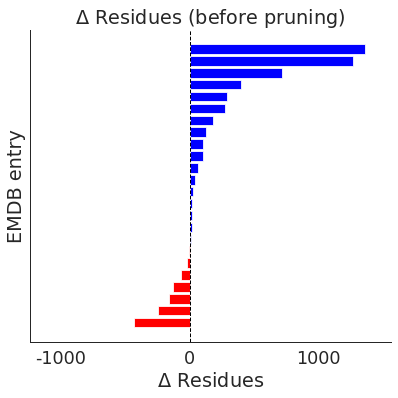

In [43]:
# plot the difference between the number of residues using hybrid map versus the number of residues (BEFORE PRUNING) using unsharpened maps
ylabel = "EMDB entry"
xlabel = r"$\Delta$ Residues"
title = r"$\Delta$ Residues (before pruning)"
emdb_list = [x.split("_")[0] for x in emdb_list_ordered]
fig, ax = plot_difference_plots(emdb_list, num_residues_difference_before_pruning, xlabel, ylabel, title, figsize_cm=(15,15), \
                                marker="o", markersize=6,fontscale=2,font="Helvetica", \
                                linewidth=1,legends=None, num_yticks=6,emdb_list_to_show=emdb_list_to_show)

fig.savefig("difference_in_number_of_residues_before_pruning.eps", dpi=600, bbox_inches="tight")


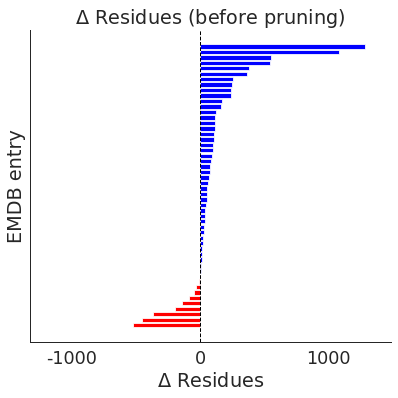

In [27]:
# plot the difference between the number of residues using hybrid map versus the number of residues (BEFORE PRUNING) using deposited maps
ylabel = "EMDB entry"
xlabel = r"$\Delta$ Residues"
title = r"$\Delta$ Residues (before pruning)"
emdb_list = [x.split("_")[0] for x in emdb_list_ordered]
fig, ax = plot_difference_plots(emdb_list, num_residues_difference_deposited_before_pruning, xlabel, ylabel, title, figsize_cm=(15,15), \
                                marker="o", markersize=6,fontscale=2,font="Helvetica", \
                                linewidth=1,legends=None, num_yticks=6,emdb_list_to_show=emdb_list_to_show)

#fig.savefig("difference_in_number_of_residues_before_pruning_deposited.eps", dpi=600, bbox_inches="tight")


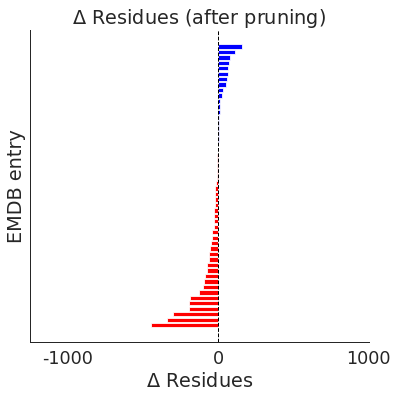

In [28]:
# plot the difference between the number of residues using hybrid map versus the number of residues (AFTER PRUNING) using deposited maps
ylabel = "EMDB entry"
xlabel = r"$\Delta$ Residues"
title = r"$\Delta$ Residues (after pruning)"
emdb_list = [x.split("_")[0] for x in emdb_list_ordered]
fig, ax = plot_difference_plots(emdb_list, num_residues_difference_deposited_after_pruning, xlabel, ylabel, title, figsize_cm=(15,15), \
                                marker="o", markersize=6,fontscale=2,font="Helvetica", \
                                linewidth=1,legends=None, num_yticks=6,emdb_list_to_show=emdb_list_to_show)

#fig.savefig("difference_in_number_of_residues_after_pruning_deposited.eps", dpi=600, bbox_inches="tight")


In [29]:

def jsonify_dictionary(input_dict):
    # convert pickle object to json object
    new_dict = {}
    for key, value in input_dict.items():
        key = str(key) 
        value_is_iterable = isinstance(value, (list, tuple, np.ndarray))
        value_is_dict = isinstance(value, dict)
        value_is_float = isinstance(value, float)
        value_is_int = isinstance(value, (np.int64, int, np.int32))
        value_is_string = isinstance(value, str)
        
        # print("key: {}, value_is_iterable: {}, value_is_dict: {}, value_is_float: {}, \
        #       value_is_int: {}, value_is_string: {}".format(key, value_is_iterable, \
        #                                                     value_is_dict, value_is_float, value_is_int, value_is_string))
        
        if value_is_dict:
            new_value = jsonify_dictionary(value)
        elif value_is_iterable:
            new_value = [str(x) for x in value]
        elif not value_is_string:
            new_value = str(value)
        
        new_dict[key] = new_value
        
    
    return new_dict 

In [32]:
# Dump the data to a json file
import json 

model_angel_results = {}
model_angelo_results = {
    "using_unsharpened_maps": {
        "num_residues_before_pruning": num_residues_using_unsharpened_raw,
        "num_residues_after_pruning": num_residues_using_unsharpened,
    },
    "using_deposited_maps": {
        "num_residues_before_pruning": num_residues_using_deposited_raw,
        "num_residues_after_pruning": num_residues_using_deposited,
    },
    "using_hybrid_maps": {
        "num_residues_before_pruning": num_residues_using_hybrid_raw,
        "num_residues_after_pruning": num_residues_using_hybrid,
    },
    "difference": {
        "hybrid_minus_unsharpened_before_pruning": num_residues_difference_before_pruning_hybrid_minus_unsharpened,
        "hybrid_minus_unsharpened_after_pruning": num_residues_difference_after_pruning_hybrid_minus_unsharpened,
        "hybrid_minus_deposited_before_pruning": num_residues_difference_before_pruning_hybrid_minus_deposited,
        "hybrid_minus_deposited_after_pruning": num_residues_difference_after_pruning_hybrid_minus_deposited,
    }
}

output_json_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/model_angelo_analysis"

with open(os.path.join(output_json_folder, "model_angelo_results.json"), "w") as f:
    json.dump(jsonify_dictionary(model_angelo_results), f, indent=4)

    

<BarContainer object of 52 artists>

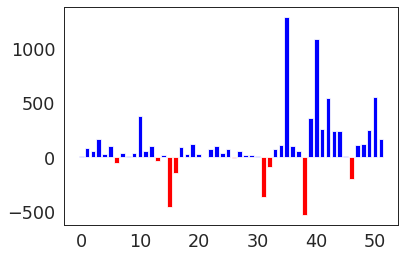

In [34]:
# re-plot the difference between the number of residues using hybrid map versus the number of residues (AFTER PRUNING) using unsharpened maps
plot_data = model_angelo_results["difference"]["hybrid_minus_deposited_before_pruning"]

plt.bar(np.arange(len(emdb_list_ordered)), num_residues_difference_deposited_before_pruning, color=["blue" if num_residues_difference_deposited_before_pruning[i] > 0 else "red" for i in range(len(emdb_list_ordered))])